## Visualizing results of the Second Edition -  Original Geoparser

We have run the [Edinburgh geoparser](https://programminghistorian.org/en/lessons/geoparsing-text-with-edinburgh#patch-fix) to extract and resolvoe locations contained within the books of the **Second Edition** of the *Encyclopaedia Britannica*, which has 832 pages.
                             
The query for running that we have used is the following: 

`spark-submit --py-files defoe.zip defoe/run_query.py nls_second_edtion.txt nls defoe.nls.queries.geoparser_pages -r geopaser_original_EB_second_edition -n 16`

The nls_first_edition.txt has the path of this particular book that we are exploring:

`/home/tdm/datasets/nls-data-encyclopaediaBritannica/144850370
/home/tdm/datasets/nls-data-encyclopaediaBritannica/144850373
/home/tdm/datasets/nls-data-encyclopaediaBritannica/144850374
/home/tdm/datasets/nls-data-encyclopaediaBritannica/144850375
/home/tdm/datasets/nls-data-encyclopaediaBritannica/144850376
/home/tdm/datasets/nls-data-encyclopaediaBritannica/144850377
/home/tdm/datasets/nls-data-encyclopaediaBritannica/144850378
/home/tdm/datasets/nls-data-encyclopaediaBritannica/144850379
/home/tdm/datasets/nls-data-encyclopaediaBritannica/190273289
/home/tdm/datasets/nls-data-encyclopaediaBritannica/190273290`

The results file ( [geoparser_first_edition](http://localhost:8888/edit/results_NLS/geoparser_original_EB_second_edition)) is stored in this repository under the *results_NLS* subdirectory. 


### Loading the necessary libraries

In [1]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def geresolution_dataframe(result):
    dfs=[]
    data=[]
    c_locs=[]
    for i in result.keys():
        t_ind = 0
        e_ind = 0
        for k in result[i]:
            locs= k["georesolution_page"]
            page = k["text_unit id"]
       
            if locs != {}:
                data=[]
                l_ind = 0
                for i in locs:
                    if type(locs[i]) == type([]) :
                        c_locs=locs[i].copy()
                        c_locs.append(i.split("-")[0])
                        c_locs.append(page)
                        data.append(c_locs)
                        l_ind = l_ind + 1   
                e_ind = t_ind + l_ind 
                if data:
                    df_page = pd.DataFrame(data, columns = ['Latitude', 'Longitude', 'Place', 'Page'], 
                                      index=list(range(t_ind, e_ind)))
                    dfs.append(df_page)
                    t_ind=e_ind
    df_total = pd.concat(dfs)
    return df_total

In [4]:
def get_place(df, lat, long):
    df_new=df.loc[(df['Latitude'] == lat) & (df_total['Longitude'] == long)]['Place']
    return df_new.count(), df_new.iloc[0]

In [5]:
def label_freq_places(df_total, df_max_geolocations, filter_list):
    place_label=[]
    place_freq = []
    i_limit = 15
    i =0
    k =0 
    while k < i_limit:
        place_count, place_name = get_place(df_total, df_max_geolocations.iloc[i]['Latitude'], df_max_geolocations.iloc[i]['Longitude'] )
        if place_name not in filter_list:
            print(i, place_count,place_name)
            place_label.append(place_name)
            place_freq.append(place_count)
            k = k + 1
        i = i + 1
    return place_label, place_freq

In [6]:
def plot_bar_places(place_label, place_freq):
    # this is for plotting purpose
    index = np.arange(len(place_label))
    plt.bar(index, place_freq)
    plt.xlabel('Places', fontsize=10)
    plt.ylabel('Frequency of Places', fontsize=5)
    plt.xticks(index, place_label, fontsize=8, rotation=40)
    plt.title('15 Places most mentioned')
    plt.show()

### Information about the defoe geoparser query

This query does the following tasks:

- Ingests all the pages from all the books of the first edition
- Cleans the text applied two fixes: Long-s and hyphen words
- Identifies *entities* using the original geotagging of the Edinburgh geoparser. 
- From the previous entities, just selects the one about *location* and creates an xml (in memory) per page with these "location" entities. 
- Applies the georesolve of the Edinburgh geoparser to each xml and gets lat and long. **Important: Everything is in memory, we do not create XML files in those steps**
- Group the results by Book's title, and also gets some informative metadata

As a result we get a file per gazetter|book with an entry per page with the following information:

    * archive_filename: Path to the gazetteer 
    * clean_text: Page's clean text after applying 2 fixes: long-S and hyphenate words
    * edition: Edition of the gazetteer
    * georesolution_page: Page's geolocations after applying the georesolver
    * model: defoe model – could be fmp|nls|papers|alto. In this case is “nls”
    * text_unit: page (for other defoe models could be “article”)
    * num_text_unit: number of tex units. 
    * page_filename: Page's filename (page's relative path)
    * text_unit id: The number of this page (e.g. Page 1)
    * lang_model : The language model applied (original_geoparser)
    * type_distribution: type of document (newspaper|book). In this case is "book". 
    * year: Publication year 



In [7]:
results=read_query_results('geopaser_original_EB_second_edition')

In [8]:
df_total= geresolution_dataframe(results)

In [9]:
df_total[["Place"]].count()

Place    104652
dtype: int64

In [10]:
df_total.groupby("Page").count()

,Latitude,Longitude,Place
Page,,,
Page10,217,217,217
Page100,64,64,64
Page1001,7,7,7
Page1002,4,4,4
Page1003,10,10,10
Page1004,16,16,16
Page1005,37,37,37
Page1006,25,25,25
Page1007,47,47,47


In [11]:
df_total.groupby(["Latitude", "Longitude"]).count()

,,Place,Page
Latitude,Longitude,,
,,102179,102179
-0.22831,-78.34316,1,1
-1,15.5,1,1
-10,-75.25,3,3
-10.44026,14.95326,1,1
-11.27398,159.75935,1,1
-12.06254,15.13819,1,1
-12.5,18.5,1,1
-12.57626,13.40547,1,1


In [12]:
df_filter = df_total[['Latitude','Longitude']].groupby(['Latitude', 'Longitude'])['Longitude'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)     

df_max_geolocations=df_filter.drop([0])
# getting the 10 GEOLOCATIONS more repeated
df_max_geolocations.head(10)


,Latitude,Longitude,count
266,35.39487,140.07186,81
925,52.16045,-0.70312,56
733,46,2,49
805,48.69096,9.14062,43
916,52,20,38
613,42.83333,12.83333,36
1006,56,-4,32
813,48.85341,2.3488,27
983,54.75844,-2.69531,25
147,27,30,24


In [17]:
# Getting the geolocation details of the max frequency (35.39487 	140.07186)
place_count, place_name= get_place(df_total, '35.39487', '140.07186')
place_count, place_name

(81, 'Lin')

In [18]:
#Getting the 15 places (and their frequencies) most mentioned
filter_list=['']
place_label, place_freq = label_freq_places(df_total, df_max_geolocations, filter_list)
    

0 81 Lin
1 56 England
2 49 France
3 43 Europe
4 38 Poland
5 36 Italy
6 32 Scotland
7 27 Paris
8 25 Britain
9 24 Egypt
10 24 Germany
11 23 Saxony
12 23 Spain
13 22 Rome
14 22 Africa


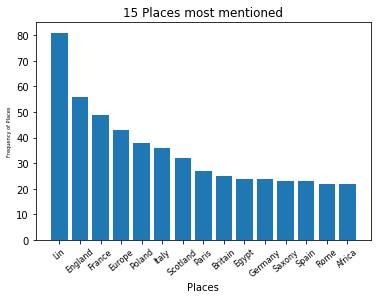

In [19]:
#Visualizing the 15 places in a Bar plot
plot_bar_places(place_label, place_freq)